In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("mario.csv")

In [8]:
df.isnull().values.any()

False

In [9]:
df.head()

,team_id,phase,group,round,totalingred
0,21301,1,newhire,1,19
1,21301,1,newhire,2,23
2,21301,1,newhire,3,23
3,21301,1,newhire,4,25
4,21301,1,newhire,5,24


In [10]:
df.groupby(['group', 'phase'])['totalingred'].describe()

count       mean       std   min    25%   50%    75%   max
group   phase                                                            
ai      1      120.0  23.125000  4.560633   9.0  21.00  23.0  26.00  33.0
        2      120.0  26.233333  3.379954  17.0  24.00  26.5  29.00  36.0
control 1      120.0  22.441667  4.250152  11.0  20.00  23.0  25.00  31.0
        2      120.0  26.750000  3.262339  18.0  25.00  27.0  28.25  34.0
newhire 1       90.0  23.444444  4.419342  13.0  21.25  24.0  27.00  33.0
        2       90.0  27.133333  3.892372  18.0  25.00  27.0  30.00  36.0

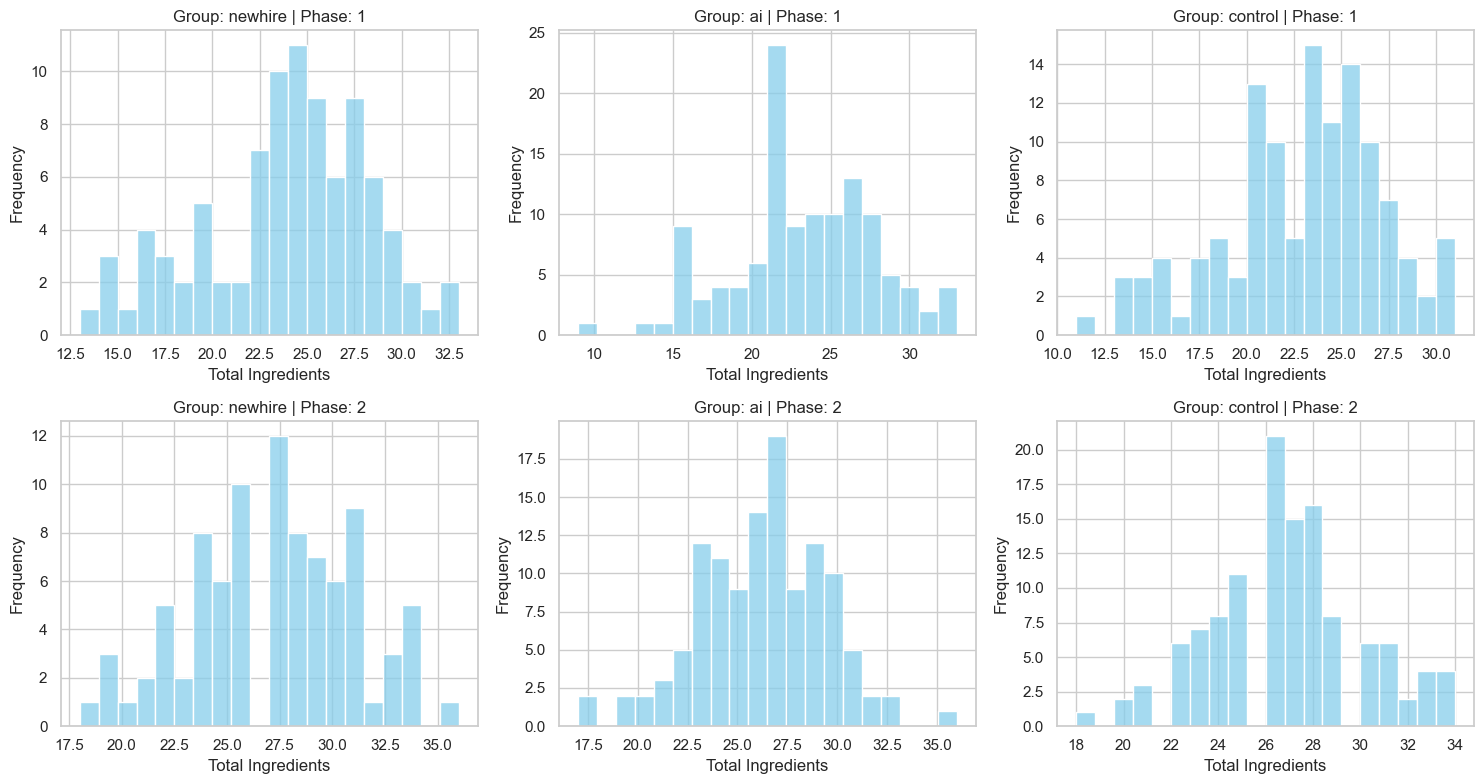

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of seaborn
sns.set(style="whitegrid")

# Create separate histograms for each group and each phase
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))

groups = df['group'].unique()
phases = df['phase'].unique()

for i, group in enumerate(groups):
    for j, phase in enumerate(phases):
        subset = df[(df['group'] == group) & (df['phase'] == phase)]
        sns.histplot(subset['totalingred'], bins=20, ax=axes[j, i], color='skyblue')
        axes[j, i].set_title(f'Group: {group} | Phase: {phase}')
        axes[j, i].set_xlabel('Total Ingredients')
        axes[j, i].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Save the figure
plt.savefig('total_ingredients_histograms_separate_group_phase.png')

# Show the plot
plt.show()


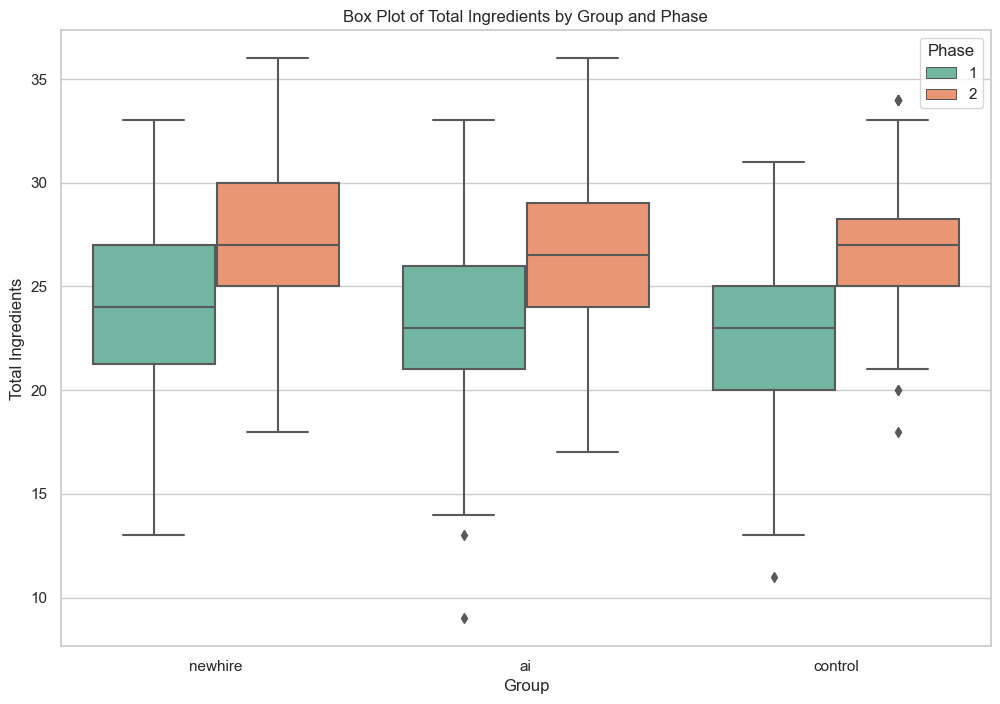

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot for both phases total ingredients for each group
plt.figure(figsize=(12, 8))
sns.boxplot(x='group', y='totalingred', hue='phase', data=df, palette='Set2')
plt.title('Box Plot of Total Ingredients by Group and Phase')
plt.xlabel('Group')
plt.ylabel('Total Ingredients')
plt.legend(title='Phase')

# Set the title before saving the figure
plt.title('Box Plot of Total Ingredients by Group and Phase')

# Save the figure
plt.savefig('box_plot.png')

# Show the plot
plt.show()
